In [1]:
import cv2 as cv
import numpy as np
import os
import sys
import torch
import matplotlib.pyplot as plt

os.getcwd()

'C:\\Users\\User\\pythonsave'

In [82]:
for dirname, _, filenames in os.walk('C:\\Users\\User\\pythonsave\\images\\myImage\\'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

C:\Users\User\pythonsave\images\myImage\1638960014944.png
C:\Users\User\pythonsave\images\myImage\20140404054625209.jpg
C:\Users\User\pythonsave\images\myImage\20161221_092256.jpg
C:\Users\User\pythonsave\images\myImage\20170629_210524.jpg
C:\Users\User\pythonsave\images\myImage\20180901_152334.jpg
C:\Users\User\pythonsave\images\myImage\20180909_212032.jpg
C:\Users\User\pythonsave\images\myImage\20200910_201033.jpg
C:\Users\User\pythonsave\images\myImage\20211204_170851.jpg
C:\Users\User\pythonsave\images\myImage\candy.t7.jpg
C:\Users\User\pythonsave\images\myImage\Edge.jpg
C:\Users\User\pythonsave\images\myImage\Edge2.jpg
C:\Users\User\pythonsave\images\myImage\Edge3.jpg
C:\Users\User\pythonsave\images\myImage\Edge4.jpg
C:\Users\User\pythonsave\images\myImage\feathers.t7.jpg
C:\Users\User\pythonsave\images\myImage\mosaic.t7.jpg
C:\Users\User\pythonsave\images\myImage\Range1.jpg
C:\Users\User\pythonsave\images\myImage\Range2.jpg
C:\Users\User\pythonsave\images\myImage\testgraph.jpg
C:

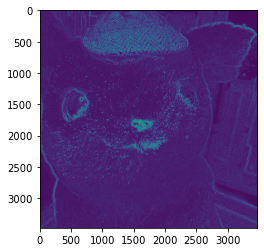

In [83]:
if __name__ == '__main__':
    # 读取图像equalLena.png
    image = cv.imread('C:\\Users\\User\\pythonsave\\images\\myImage\\20200910_201033.jpg', cv.IMREAD_ANYDEPTH)
    if image is None:
        print('Failed to read equalLena.png.')
        sys.exit()
    
    # X方向一阶边缘
    result_X = cv.Sobel(image, cv.CV_16S, 1, 0, 3)
    result_X = cv.convertScaleAbs(result_X)
    # Y方向一阶边缘
    result_Y = cv.Sobel(image, cv.CV_16S, 0, 1, 3)
    result_Y = cv.convertScaleAbs(result_Y)
    # 整幅图像的一阶边缘
    result_XY = result_X + result_Y

    # 显示结果
    plt.imshow(result_X)
    plt.imshow(result_Y)
    plt.imshow(result_XY)
    
    cv.imwrite('C:\\Users\\User\\pythonsave\\images\\myImage\\{}.jpg'.format('Edge'),result_XY)
    

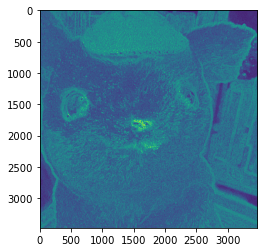

In [84]:
if __name__ == '__main__':
    # 读取图像equalLena.png
    image = cv.imread('C:\\Users\\User\\pythonsave\\images\\myImage\\20200910_201033.jpg', cv.IMREAD_ANYDEPTH)
    if image is None:
        print('Failed to read equalLena.png.')
        sys.exit()

    # X方向一阶边缘
    result_X = cv.Scharr(image, cv.CV_16S, 1, 0)
    result_X = cv.convertScaleAbs(result_X)
    # Y方向一阶边缘
    result_Y = cv.Scharr(image, cv.CV_16S, 0, 1)
    result_Y = cv.convertScaleAbs(result_Y)
    # 整幅图像的一阶边缘
    result_XY = result_X + result_Y

    # 显示结果
    #plt.imshow(result_X)
    #plt.imshow(result_Y)
    plt.imshow(result_XY)
    
    cv.imwrite('C:\\Users\\User\\pythonsave\\images\\myImage\\{}.jpg'.format('Edge2'),result_XY)

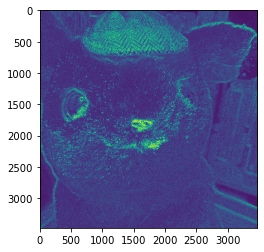

In [85]:
if __name__ == '__main__':
    # 读取图像equalLena.png
    image = cv.imread('C:\\Users\\User\\pythonsave\\images\\myImage\\20200910_201033.jpg', cv.IMREAD_ANYDEPTH)
    if image is None:
        print('Failed to read equalLena.png.')
        sys.exit()
    
    # 大阈值检测图像边缘
    result_high = cv.Canny(image, 100, 200, apertureSize=5)
    # 小阈值检测图像边缘
    result_low = cv.Canny(image, 20, 40, apertureSize=3)
    # 高斯模糊后检测图像边缘
    result_gauss = cv.GaussianBlur(image, (3, 3), 5)
    result_gauss = cv.Canny(result_gauss, 100, 200, apertureSize=3)


    # 显示结果
    #plt.imshow(result_X)
    plt.imshow(result_Y)
    #plt.imshow(result_XY)
    
    cv.imwrite('C:\\Users\\User\\pythonsave\\images\\myImage\\{}.jpg'.format('Edge3'),result_XY)

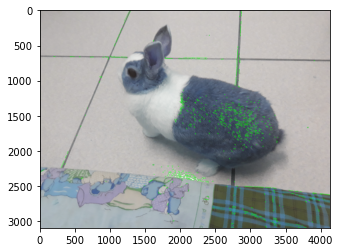

In [32]:
if __name__ == '__main__':
    # 读取图像stuff.jpg
    image = cv.imread('C:\\Users\\User\\pythonsave\\images\\myImage\\20170629_210524.jpg')
    if image is None:
        print('Failed to read stuff.jpg.')
        sys.exit()
    #cv.imshow('Origin', image)

    # 提取图像边缘
    canny = cv.Canny(image, 80, 160, 3)
    #cv.imshow('Canny Image', canny)

    # 膨胀运算
    kernel = cv.getStructuringElement(0, (3, 3))
    canny = cv.dilate(canny, kernel=kernel)

    # 轮廓检测及绘制
    contours, hierarchy = cv.findContours(canny, mode=0, method=2)

    # 寻找并绘制轮廓外接矩形
    img1 = image.copy()
    img2 = image.copy()
    for i in range(len(contours)):
        # 绘制轮廓的最大外接矩形
        max_rect = cv.boundingRect(contours[i])
        cv.rectangle(img1, max_rect, (0, 0, 255), 2, 8, 0)
        # 绘制轮廓的最小外接矩形
        min_rect = cv.minAreaRect(contours[i])
        points = cv.boxPoints(min_rect).astype(np.int64)
        img2 = cv.drawContours(img2, [points], -1, (0, 255, 0), 2, 8)

    plt.imshow(img1)
    plt.imshow(img2)
#     cv.waitKey(0)
#     cv.destroyAllWindows()
    cv.imwrite('C:\\Users\\User\\pythonsave\\images\\myImage\\{}.jpg'.format('Range1'),img1)

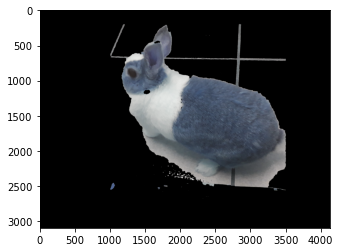

In [51]:
if __name__ == '__main__':
    # 读取图像lena.png
    image = cv.imread('C:\\Users\\User\\pythonsave\\images\\myImage\\Range2.jpg')
    if image is None:
        print('Failed to read lena.png.')
        sys.exit()
    h, w = image.shape[:-1]
    # 备份图像，防止绘制矩形框对结果产生影响
    imgRect = image.copy()
    imgRect = cv.rectangle(imgRect, (1000, 200), (3500, 2500), (255, 255, 255), 2)
    plt.imshow(imgRect)

    # 进行分割
    bgdmod = np.zeros((1, 65), dtype='float64')
    fgdmod = np.zeros((1, 65), dtype='float64')
    mask = np.zeros(image.shape[:-1], dtype='uint8')
    mask, _, _ = cv.grabCut(image, mask, rect=(1000, 200, 2500, 2500), bgdModel=bgdmod, fgdModel=fgdmod,
               iterCount=5, mode=cv.GC_INIT_WITH_RECT)

    # 将分割出的前景绘制出来
    for i in range(h):
        for j in range(w):
            n = mask[i, j]
            if n == 1 or n == 3:
                pass
            else:
                image[i, j, :] = 0

    # 展示结果
    plt.imshow(image)
    cv.imwrite('C:\\Users\\User\\pythonsave\\images\\myImage\\{}.jpg'.format('Range3'),image)

In [72]:
image = cv.imread('C:\\Users\\User\\pythonsave\\images\\myImage\\Edge2.jpg')
image.shape

(3096, 4128, 3)

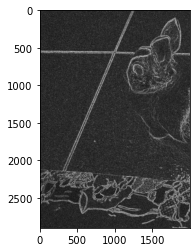

In [73]:
plt.imshow(image[100:3000,0:2000])

True

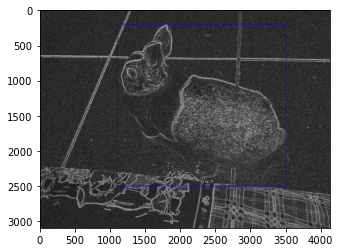

In [81]:
imgRect = image.copy()
imgRect = cv.rectangle(imgRect, (1100, 200), (3500, 2500), (0, 0, 255), 5)
plt.imshow(imgRect)
cv.imwrite('C:\\Users\\User\\pythonsave\\images\\myImage\\{}.jpg'.format('Edge4'),imgRect)